<div style="text-align:center; padding-top:10px; padding-bottom:20px">
    <font color='red'><center><h1>Hero Replacement: Determining the Best Alternatives <br> for a Banned Hero in DotA 2</h1><center/></font>
    </div>
<div style="text-align:center">
<h2>
Data Mining and Wrangling Final Project
</h2>
<h4>
Submitted by Learning Team 8 :<br/>
Justine Buno<br/>
Aries de Guzman<br/>
Ray Franco Rivera<br/>
Paul Michael Uy<br/>
</h4>
</div>

<i> This version contains the source code. Please do not use the codes without permission from the authors. </i>

<a id='executive_summary'></a>
<div>
<font color='red'><h2>1. Executive Summary</h2> </font>
</div>

<div align='justify'>
The rise of e-Sports and DotA 2 has paved way to a brand new industry -- the gaming industry. With prize pools reaching to at most $30 million dollars, winning a game of DotA 2 becomes more and more important. One of the most crucial factors in winning a DotA 2 game is drafting, wherein a team picks five (5) heroes and bans six (6) heroes from the opposing team to disrupt their strategy. </div>
<br>
<div align='justify'>In the event that a key hero is banned, what are the best alternative heroes to pick based on their game impact? </div><br>
<div align='justify'>To help the players of DotA 2 answer this problem, the researchers looked into clustering heroes based on their game impact using the data scraped from OpenDota's API. The data consists of premium matches starting from August 27, 2018 to June 16, 2019 amounting to 15260 hero observations with 14 features.</div>
<br>
<div align='justify'>K-Means algorithm was used in performing the clustering as it is useful in clustering continuous data with few features. Once clustered, similar heroes to the banned key hero can be retrieved from a specific role/cluster that a team wants it to be played, using Euclidean distance. Results of the analysis showed that heroes can be clustered into three (3) categories; Core, Utility, and Support. Based on the identified top features per cluster, Core heroes focus on dealing damage throughout the game. Utility heroes are focused on being versatile throughout the game, able to be played as a core and support depending on the situation. Lastly, Support heroes focus on maximizing the whole team's advantage by providing support to cores and buying items that contribute to the overall good of the team.</div>
<br>
<div align='justify'>K-Means clustering was successful in identifying three (3) categories as it is consistent with the ground truth of hero categories. Additionally, it was found out that certain heroes can be played in multiple roles, depending on the game strategy. This allows teams to draft with ambiguity, which can be leveraged as an advantage against an opposing team. Lastly, identifying a similar hero based on a certain cluster is useful in minimizing the deviation of a team from its original strategy.</div>
<br>
<div align='justify'>For future study, the researchers recommend to further optimize the data by separating win and lose games. It is also recommended that the data be focused on a specific DotA 2 patch and should be continuously updated to maintain relevance to the current metagame.</div>
<br>


<a id='table_of_contents'></a>
**<font color='red'>TABLE OF CONTENTS</font>**
1. [Executive Summary](#executive_summary)
2. [Introduction](#introduction)<br>
2.1 [DotA 2 Basics](#dota2_basics)<br>
2.2 [Objective of the Study](#objective)<br>
2.3 [Significance of the Study](#significance)<br>
2.4 [Scope and Limitations](#scope)
3. [Data Description](#data_description)<br>
3.1 [Data Source](#data_source)<br>
3.2 [Data Structure](#data_structure)<br>
3.3 [Data Dictionary](#data_dictionary)
4. [Data Processing](#data_processing)<br>
4.1 [Data Scraping](#data_scraping)<br>
4.2 [Raw Data Storage](#data_storage)<br>
4.3 [Feature Selection and Data Cleaning](#data_cleaning)<br>
4.3 [Polished Data](#data_polished)<br>
5. [Exploratory Data Analysis](#data_analysis)
6. [Methodology](#methodology)<br>
6.1 [Normalizing the Data](#normalize_data)<br>
6.2 [Clustering using K-Means](#clustering_kmeans)<br>
6.2.1 [Determining the Optimal Number of Clusters](#internal_validation)<br>
7. [Clustering](#clustering)<br>
7.1 [Determining the Most Similar Heroes for a Sampled Hero](#information_retrieval)<br>
8. [Conclusions](#conclusions)
9. [Recommendations](#recommendations)
10. [References and Acknowledgement](#references)
11. [Contact Us](#contact)

<a id='introduction'></a>
<div>
<font color='red'><h2>2. Introduction</h2> </font>
</div>

<div align='justify'>In every sport, it is the goal of every team to win. The most important factor in winning a DotA2 game is to properly execute a team’s game strategy by drafting the right heroes. However, in professional games, each team is only allowed to pick five (5) heroes for their team and ban six (6) heroes to hamper the opposing team’s strategy. By banning heroes, teams are forced to make adjustments to their strategy that may cause their defeat. The objective of this study is to minimize the deviation to the team’s overall strategy when a key hero is banned by recommending the most similar hero based on their game impact.</div>


<a id='dota2_basics'></a>
<div style="padding:15px">
<font color='red'><h3>2.1 DotA 2 Basics</h3> </font>
</div>

<div align='justify'>DotA2 is a team-oriented game pitting two teams of five players against each other. A game is won by destroying the enemy's Ancient building before they destroy yours. The Ancient is the largest building and is centrally located in each team's base. The teams are often referred to as the Radiant and the Dire (see Figure 1).</div>

<img src='radiantvsdire.JPG'/>
<center><b>Figure 1. Radiant vs Dire</b></center><br>

<div align='justify'>The goal of each team is to spend time gaining resources such as experience and gold while limiting and reducing the opposing team's resources. The team with greater resources will have a bigger advantage, enabling them to destroy important objectives and eventually, the enemy's Ancient.</div><br>

<div align='justify'>At the start of each game, each player controls a unique hero out of a pool of 117 heroes. A typical professional match starts with each team's captain banning six (6) heroes and drafting five (5) heroes alternatively (see Figure 2).</div>

<img src='cmdraft.JPG'/>
<center><b>Figure 2. Captains Mode picking order</b></center><br>

<div align='justify'>A captain drafts certain heroes according to their strategy and bans heroes that may disrupt their strategy, or be of synergy to the opposing team's strategy.</div>

<a id='objective'></a>
<div style="padding:15px">
<font color='red'><h3>2.2 Objective of the Study</h3> </font>
</div>

The objective of this study is to cluster heroes based on their game impact and identify alternative heroes most similar to a banned hero in the event that an opposing team disrupts a team's key strategy by banning their key hero.

<a id='significance'></a>
<div style="padding:15px">
<font color='red'><h3>2.3 Significance of the Study</h3> </font>
</div>

<div>
<div align='justify'>The e-Sports industry is currently a multi-million-dollar industry that is poised to reach new heights this year. According to recent studies, the total revenue for the e-Sports market is projected to hit $1.1 billion dollars this year -- 26.7% higher than the previous year.</div>
<br>

<div align='justify'>Due to high tournament prize pools with amounts reaching to at most $30 million dollars, traditional sports teams have been investing on e-Sports teams to get their start in the industry.</div>
<br>
<div align='justify'>For every competitive sport, it is obvious that winning is crucial. DotA 2 is not any different. A big determinant for winning DotA 2 games is how a team drafts to execute their game strategy.</div>
</div>

<a id='scope'></a>
<div style="padding:15px">
<font color='red'><h3>2.4 Scope and Limitation</h3> </font>
</div>

<div align='justify'>This study focuses only on the premium matches in the recent 2019 DotA Pro Circuit regardless of the game result. This means that all games, whether resulted to a win or lose, are accounted. Another dimension that was not explored in the analysis is the duration of the game. The duration of the game may have an effect on the distribution of values for each hero observation.</div>

[Back to Table of Contents](#table_of_contents)

<a id='data_description'></a>
<div>
<font color='red'><h2>3. Data Description</h2> </font>
</div>

<div align='justify'>Just like any other competitive sport, DotA 2 is blessed with huge chunks of stats. For this particular analysis, the researchers focused on <b>premium</b> matches starting from 27 August 2018 up to 16 June 2019.</div><br>

<div align='justify'>Why so? Well, similar to an NBA season, DotA 2 also has a so called DotA Pro Circuit or DPC in short. The DPC is composed of ten (10) tournaments in which the winners will earn qualifying points for the most prestigious DotA 2 tournament held every year called The International or commonly referred to as TI. For analogy, TI is like the NBA Playoffs. Thus, for the purposes of relevance to the current metagame, the researchers collected match data appropriate to one (1) DPC which spans for one (1) whole year.</div>

For more info about the DPC, you can visit https://www.dota2.com/procircuit.

<i>*NOTE: `premium` matches are DPC games which are in essence, professional DotA 2 matches.</i>

<a id='data_source'></a>
<div style="padding:15px">
<font color='red'><h3>3.1 Data Source</h3> </font>
</div>

<div align='justify'> Premium matches are identified by Match IDs which were obtained using OpenDota's <a href="https://www.opendota.com/explorer"/>data explorer</a> (see Figure 3). The data explorer is a tool provided by OpenDota to run advanced SQL queries on their database of professional matches. Retrieved Match IDs were then stored to a .csv file named <i>premium match ids</i>. </div><br>

<img src='dataexplorer.png'/>
<center><b>Figure 3. OpenDota Data Explorer</b></center><br>

<div align='justify'>After retrieving the Match IDs, the researchers obtained each Match ID's match data using the <a href="https://docs.opendota.com/#"/> OpenDota API.</a> which accepts the Match ID as an input and returns a .json file. Each API response was filtered out to include relevant information only. More on this in Section 3.3.</div>

<a id='data_structure'></a>
<div style="padding:15px">
<font color='red'><h3>3.2 Data Structure</h3> </font>
</div>

<div align='justify'>The dataframe is composed of 15,260 rows and 31 columns which contains match data of 1,526 premium matches and is stored in a database named <i>dmwfinalproject</i>. Each match data consists of ten rows, one row for each unique hero and 31 columns (or features). Details on how the data was scraped using OpenDota's API will be discussed in Section 4.</div>

In [1]:
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import requests
import json
from sklearn.metrics import calinski_harabaz_score, silhouette_score
from scipy.spatial.distance import euclidean, cityblock, cosine
from collections import Counter, OrderedDict
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from math import pi

In [2]:
# Connecting to the database
conn = sqlite3.connect('dmwfinalproject.db')
c = conn.cursor()

# Select the dataframe from the database
df_ds = pd.read_sql('''SELECT * FROM dota2''', conn)

# Set hero_id as index for visualization
df_ds.set_index('hero_id').head()

,ancient_kills,assists,camps_stacked,courier_kills,creeps_stacked,deaths,denies,gold_per_min,gold_spent,hero_damage,...,player_slot,roshan_kills,rune_pickups,sen_placed,sentry_kills,sentry_uses,stuns,tower_damage,tower_kills,xp_per_min
hero_id,,,,,,,,,,,,,,,,,,,,,
brewmaster,0.0,6,0.0,0.0,0.0,7,11,414,9460,11937,...,0,0.0,3.0,0.0,0.0,0.0,41.122314,573,0.0,511
treant,0.0,10,0.0,0.0,0.0,7,1,263,7325,5514,...,1,0.0,4.0,1.0,0.0,1.0,59.418800,230,1.0,301
necrolyte,0.0,2,0.0,0.0,0.0,8,11,419,10135,11852,...,2,0.0,3.0,0.0,0.0,0.0,13.081226,1201,1.0,376
furion,0.0,9,0.0,2.0,0.0,7,0,285,7255,11574,...,3,0.0,3.0,5.0,1.0,4.0,13.773438,2586,1.0,319
mirana,0.0,8,0.0,0.0,0.0,7,10,385,10945,13182,...,4,0.0,2.0,0.0,0.0,0.0,9.611982,926,0.0,371


In [3]:
print("The dataframe's shape is:", df_ds.shape)

The dataframe's shape is: (15260, 31)


<a id='data_dictionary'></a>
<div style="padding:15px">
<font color='red'><h3>3.3 Data Dictionary</h3> </font>
</div>

<div align='justify'>The following is the data dictionary of the relevant information gathered from the OpenDota API. "Relevant information" was filtered based on metrics that affect the game impact of a hero. Game impact is defined by the researchers as any hero statistic that contribute to the objectives of the game. Some hero statistics include hero damage dealt, tower damage done, and etc.</div><br> 

<div align='justify'>These metrics were carefully chosen by the researchers based on their domain knowledge. Each metric serves as the column or feature described in Table 1. To see the complete list of the API response of OpenDota, click <a href='https://docs.opendota.com/#tag/matches%2Fpaths%2F~1matches~1%7Bmatch_id%7D%2Fget'>here</a>.</div><br><br>

<center><b>Table 1. Data Dictionary</b></center>
<table>
    <tr>
        <th>Features</th>
        <th>Description</th>
    </tr>
    <tr>
        <th>Categorical</th>
    </tr>
    <tr>
        <td>hero_id</td>
        <td>The ID value of the hero played</td>
    </tr>      
    <tr>
        <td>match_id</td>
        <td>The ID number of the match assigned by Valve</td>
    </tr>  
    <tr>
        <td>player_slot</td>
        <td>Which slot the player is in. 0-127 are Radiant, 128-255 are Dire</td>
    </tr>  
    <tr>
        <th> </th>
        <th> </th>
    </tr>
    <tr>
        <th> </th>
        <th> </th>
    </tr>
    <tr>
        <th>Numerical</th>
        <th> </th>
    </tr>    
    <tr>
        <td>ancient_kills</td>
        <td>Total number of Ancient creeps killed by the player</td>
    </tr>
    <tr>
        <td>assists</td>
        <td>Number of assists the player had</td>
    </tr>
    <tr>
        <td>camps_stacked</td>
        <td>Number of camps stacked</td>
    </tr>
    <tr>
        <td>courier_kills</td>
        <td>Total number of courier kills the player had</td>
    </tr>
    <tr>
        <td>creeps_stacked</td>
        <td>Number of creeps stacked</td>
    </tr>
    <tr>
        <td>deaths</td>
        <td>Number of deaths</td>
    </tr>    
    <tr>
        <td>denies</td>
        <td>Number of denies</td>
    </tr>    
    <tr>
        <td>gold_per_min</td>
        <td>Gold Per Minute obtained by this player</td>
    </tr>    
    <tr>
        <td>gold_spent</td>
        <td>How much gold the player spent</td>
    </tr>    
    <tr>
        <td>hero_damage</td>
        <td>Hero Damage Dealt</td>
    </tr>    
    <tr>
        <td>hero_healing</td>
        <td>Hero Healing Done</td>
    </tr>      
    <tr>
        <td>kda</td>
        <td>Kill-Death-Assist ratio</td>
    </tr>    
    <tr>
        <td>kills</td>
        <td>Number of kills</td>
    </tr>    
    <tr>
        <td>last_hits</td>
        <td>Number of last hits</td>
    </tr>    
    <tr>
        <td>level</td>
        <td>Level at the end of the game</td>
    </tr>      
    <tr>
        <td>neutral_kills</td>
        <td>Total number of neutral creeps killed</td>
    </tr>  
    <tr>
        <td>obs_placed</td>
        <td>Total number of observer wards placed</td>
    </tr>  
    <tr>
        <td>observer_kills</td>
        <td>Total number of observer wards killed by the player</td>
    </tr>  
    <tr>
        <td>observer_uses</td>
        <td>Number of observer wards used</td>
    </tr>  
    <tr>
        <td>roshan_kills</td>
        <td>Total number of roshan kills (last hit on roshan) the player had</td>
    </tr>  
    <tr>
        <td>rune_pickups</td>
        <td>Number of runes picked up</td>
    </tr>  
    <tr>
        <td>sen_placed</td>
        <td>How many sentries were placed by the player</td>
    </tr>  
    <tr>
        <td>sentry_kills</td>
        <td>Total number of sentry wards killed by the player</td>
    </tr>  
    <tr>
        <td>sentry_uses</td>
        <td>Number of sentry wards used</td>
    </tr>  
    <tr>
        <td>stuns</td>
        <td>Total stun duration of all stuns by the player</td>
    </tr>  
    <tr>
        <td>tower_damage</td>
        <td>Total tower damage done by the player</td>
    </tr>  
    <tr>
        <td>tower_kills</td>
        <td>Total number of tower kills the player had</td>
    </tr>  
    <tr>
        <td>xp_per_min</td>
        <td>Experience Per Minute obtained by the player</td>
    </tr>  

</table>

[Back to Table of Contents](#table_of_contents)

<a id='data_processing'></a>
<div>
<font color='red'><h2>4. Data Processing</h2> </font>
</div>

<div align='justify'>In this section, data is collected and translated into usable information. Data processing starts with scraping the data in its raw form from <a href='https://docs.opendota.com'>https://docs.opendota.com</a> and converts it into a more readable format, giving it the form and context necessary to be interpreted by computers and utilized by the researchers.</div>

<a id='data_scraping'></a>
<div style="padding:15px">
<font color='red'><h3>4.1 Data Scraping</h3> </font>
</div>

As mentioned in [Section 3.2](#data_structure), the dataframe is composed of 15,260 rows with 31 columns which was scraped using the OpenDota API and the requests library. The API response was then parsed using the json library.

The actual code for scraping is shown below.

In [4]:
# Importing premium match ids needed from the retrieved .csv file
df_prem_mids = pd.read_csv('premium match ids.csv')
prem_mids = df_prem_mids['match_id'].tolist()

In [5]:
# Preliminaries
# Create a list of stats or features to be scraped
stat_list = ['match_id', 'player_slot', 'assists', 'camps_stacked',
             'creeps_stacked', 'deaths', 'denies', 'gold_per_min',
             'gold_spent', 'hero_damage', 'hero_healing', 'hero_id', 'kills',
             'last_hits', 'level', 'obs_placed', 'rune_pickups', 'sen_placed',
             'stuns', 'tower_damage', 'xp_per_min', 'kda', 'neutral_kills',
             'tower_kills', 'courier_kills', 'observer_kills', 'sentry_kills',
             'roshan_kills', 'ancient_kills', 'observer_uses', 'sentry_uses']

# Since, the OpenDota API returns hero_id as an integer, we create a hero id
# and hero name mapping
hero_id = {
    1: "antimage",
    2: "axe",
    3: "bane",
    4: "bloodseeker",
    5: "crystal_maiden",
    6: "drow_ranger",
    7: "earthshaker",
    8: "juggernaut",
    9: "mirana",
    10: "morphling",
    11: "nevermore",
    12: "phantom_lancer",
    13: "puck",
    14: "pudge",
    15: "razor",
    16: "sand_king",
    17: "storm_spirit",
    18: "sven",
    19: "tiny",
    20: "vengefulspirit",
    21: "windrunner",
    22: "zuus",
    23: "kunkka",
    25: "lina",
    26: "lion",
    27: "shadow_shaman",
    28: "slardar",
    29: "tidehunter",
    30: "witch_doctor",
    31: "lich",
    32: "riki",
    33: "enigma",
    34: "tinker",
    35: "sniper",
    36: "necrolyte",
    37: "warlock",
    38: "beastmaster",
    39: "queenofpain",
    40: "venomancer",
    41: "faceless_void",
    42: "skeleton_king",
    43: "death_prophet",
    44: "phantom_assassin",
    45: "pugna",
    46: "templar_assassin",
    47: "viper",
    48: "luna",
    49: "dragon_knight",
    50: "dazzle",
    51: "rattletrap",
    52: "leshrac",
    53: "furion",
    54: "life_stealer",
    55: "dark_seer",
    56: "clinkz",
    57: "omniknight",
    58: "enchantress",
    59: "huskar",
    60: "night_stalker",
    61: "broodmother",
    62: "bounty_hunter",
    63: "weaver",
    64: "jakiro",
    65: "batrider",
    66: "chen",
    67: "spectre",
    69: "doom_bringer",
    68: "ancient_apparition",
    70: "ursa",
    71: "spirit_breaker",
    72: "gyrocopter",
    73: "alchemist",
    74: "invoker",
    75: "silencer",
    76: "obsidian_destroyer",
    77: "lycan",
    78: "brewmaster",
    79: "shadow_demon",
    80: "lone_druid",
    81: "chaos_knight",
    82: "meepo",
    83: "treant",
    84: "ogre_magi",
    85: "undying",
    86: "rubick",
    87: "disruptor",
    88: "nyx_assassin",
    89: "naga_siren",
    90: "keeper_of_the_light",
    91: "wisp",
    92: "visage",
    93: "slark",
    94: "medusa",
    95: "troll_warlord",
    96: "centaur",
    97: "magnataur",
    98: "shredder",
    99: "bristleback",
    100: "tusk",
    101: "skywrath_mage",
    102: "abaddon",
    103: "elder_titan",
    104: "legion_commander",
    105: "techies",
    106: "ember_spirit",
    107: "earth_spirit",
    108: "abyssal_underlord",
    109: "terrorblade",
    110: "phoenix",
    111: "oracle",
    112: "winter_wyvern",
    113: "arc_warden",
    114: "monkey_king",
    119: "dark_willow",
    120: "pangolier",
    121: "grimstroke",
    129: "mars"
}

In [7]:
# Scraping identified stats or features per match id and saving to a dataframe
# to_df = []

# for mid in prem_mids:
#     url = 'https://api.opendota.com/api/matches/' + str(mid) + '?api_key'
#     resp = requests.get(url)

#     # Converting resp.text to json_file
#     json_file = json.loads(resp.text)

#     try:
#         for i in range(len(json_file['players'])):
#             temp_dict = {}

#             for key in stat_list:
#                 try:
#                     if key == 'hero_id':  # Convert hero_id to hero name
#                         temp_dict[key] = hero_id[json_file['players']
#                                                  [i]['hero_id']]

#                     else:
#                         temp_dict[key] = json_file['players'][i][key]

#                 except:
#                     temp_dict[key] = np.nan

#             to_df.append(temp_dict)

#     except:
#         continue

<a id='data_storage'></a>
<div style="padding:15px">
<font color='red'><h3>4.2 Raw Data Storage</h3> </font>
</div>

For replication of the study and easier reanalysis, the data was stored in a database named `dmwfinalproject`.

In [8]:
# Storing dataframe to the database
# df = pd.DataFrame(to_df)
# df.to_sql('dota2', conn, if_exists='replace', index=False) 

<a id='data_cleaning'></a>
<div style="padding:15px">
<font color='red'><h3>4.3 Feature Selection and Data Cleaning</h3> </font>
</div>

<div align='justify'>Since not all the features selected from the API are needed in the study, it is important to filter only those features that greatly affect the heroes' game impact. Through the domain knowledge of the researchers, 17 features were dropped as some are redundant characteristics or irrelevant of the game impact. This resulted to 14 features which will be the working data for the study.</div>

The features selected are the following:
- Ancient kills
- Camps stacked
- Denies
- Gold per minute
- Hero damage
- Hero healing
- KDA
- Neutral kills
- Observers placed
- Rune pickups
- Sentries placed
- Stuns
- Tower damage
- XP per minute
<br><br>

<div align='justify'>For the data cleaning part, the output of OpenDota's API is already relatively clean. However, null/none values were encoded when the hero does not have values for a specific feature. Thus, to simplify the data and in preparation for the analysis, null/none values were replaced by zero (0).</div>

In [6]:
# Connecting to the database
conn = sqlite3.connect('dmwfinalproject.db')
c = conn.cursor()

# Importing the data from the table named dota2
df_from_sql = pd.read_sql('''SELECT * FROM dota2''', conn)

In [7]:
# Creating a hero name mapping, to be used later after clustering
df_target = df_from_sql['hero_id']

# Identifying features to drop
to_drop = ['courier_kills', 'creeps_stacked', 'assists', 'deaths',
           'gold_spent', 'hero_id', 'kills', 'last_hits', 'level', 'match_id',
           'observer_kills', 'observer_uses', 'player_slot', 'roshan_kills',
           'sentry_kills', 'sentry_uses', 'tower_kills']

In [8]:
# Dropping unnecessary features
df_dropped = df_from_sql.drop(columns=to_drop)
df_dropped = df_dropped.replace(np.nan, 0.0)
df_dropped['hero_id'] = df_target

<a id='data_polished'></a>
<div style="padding:15px">
<font color='red'><h3>4.4 Polished Data</h3> </font>
</div>

After feature selection and data cleaning , here is how the working data looks like.

In [9]:
df_dropped.head()

,ancient_kills,camps_stacked,denies,gold_per_min,hero_damage,hero_healing,kda,neutral_kills,obs_placed,rune_pickups,sen_placed,stuns,tower_damage,xp_per_min,hero_id
0,0.0,0.0,11,414,11937,0,1,27.0,0.0,3.0,0.0,41.122314,573,511,brewmaster
1,0.0,0.0,1,263,5514,4793,1,5.0,0.0,4.0,1.0,59.418800,230,301,treant
2,0.0,0.0,11,419,11852,1709,0,25.0,1.0,3.0,0.0,13.081226,1201,376,necrolyte
3,0.0,0.0,0,285,11574,150,1,5.0,14.0,3.0,5.0,13.773438,2586,319,furion
4,0.0,0.0,10,385,13182,0,1,53.0,0.0,2.0,0.0,9.611982,926,371,mirana


Shown below are the descriptive statistics of each feature.

In [10]:
descr_stat = []
for i in df_dropped.columns[:-1]:
    descr_stat.append(df_dropped.loc[:, i].describe())
    
df_descr_stat = pd.DataFrame(descr_stat)
df_descr_stat

,count,mean,std,min,25%,50%,75%,max
ancient_kills,15260.0,6.442857,12.574025,0.000000,0.00,0.000000,6.000000,117.0000
camps_stacked,15260.0,1.175557,1.565125,0.000000,0.00,1.000000,2.000000,22.0000
denies,15260.0,9.073657,8.584859,0.000000,3.00,6.000000,13.000000,76.0000
gold_per_min,15260.0,424.965990,159.568007,105.000000,298.00,404.000000,533.000000,1230.0000
hero_damage,15260.0,15951.867890,11072.757463,597.000000,8426.25,12920.000000,20274.250000,137388.0000
hero_healing,15260.0,1012.285714,2464.154335,0.000000,0.00,0.000000,744.250000,43270.0000
kda,15260.0,3.681979,4.479937,0.000000,1.00,2.000000,5.000000,41.0000
neutral_kills,15260.0,51.445151,57.566622,0.000000,8.00,31.000000,76.000000,515.0000
obs_placed,15260.0,3.328899,5.742847,0.000000,0.00,0.000000,3.000000,50.0000
rune_pickups,15260.0,4.641350,3.468111,0.000000,2.00,4.000000,6.000000,47.0000


<div align='justify'>As seen above, some features (hero_damage, tower_damage, hero_healing) have a very high standard deviation meaning there are higher chances of having outliers in the dataset. This might be because both the win and lose games are included, and their values are quite different from each other. Also, looking at each feature's mean values, we can see that the scales of each features differ and this might incur a big impact when not handled prior to the clustering.</div>

[Back to Table of Contents](#table_of_contents)

<a id='data_analysis'></a>
<div>
<font color='red'><h2>5. Exploratory Data Analysis</h2> </font>
</div>

Before proceeding with the clustering proper, it is important to take a glance at what the data could provide us so that we would know something to expect in the clustering. Below is a horizontal bar plot of the top 10 frequently picked heroes for the recent DPC.

[('tiny', 396), ('rubick', 306), ('earth_spirit', 297), ('oracle', 285), ('earthshaker', 284), ('doom_bringer', 282), ('terrorblade', 279), ('brewmaster', 278), ('furion', 265), ('winter_wyvern', 265)]


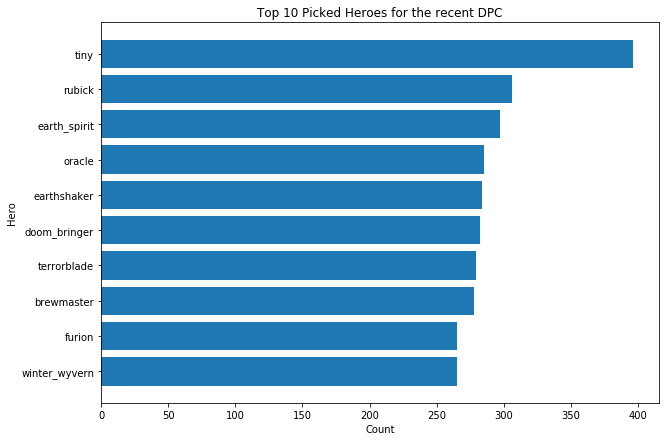

In [11]:
hero_count = Counter(df_dropped['hero_id']).most_common()
heroes = [i[0] for i in hero_count][:10][::-1]
count = [i[1] for i in hero_count][:10][::-1]

fig, ax = plt.subplots(figsize=(10,7))
ax.barh(heroes, count);
ax.set_title('Top 10 Picked Heroes for the recent DPC')
ax.set_xlabel('Count')
ax.set_ylabel('Hero')
print(hero_count[:10])

<div align='justify'>As seen from the plot, there is variability with the number of times a hero appeared in matches in the recent DPC. This is okay since clustering will be done per hero observation so we expect some heroes to appear in multiple clusters (A hero can offer varying game impact based on how it is played during the game).</div>


<div align='justify'>It is also important to look at the distribution of each feature visually to see the type of distribution each feature has. As seen on the figure below, most of the features have right-tailed distributions which means that there are values which are significantly higher than the others. It could also be noted that the scales of each feature vary.</div><br>

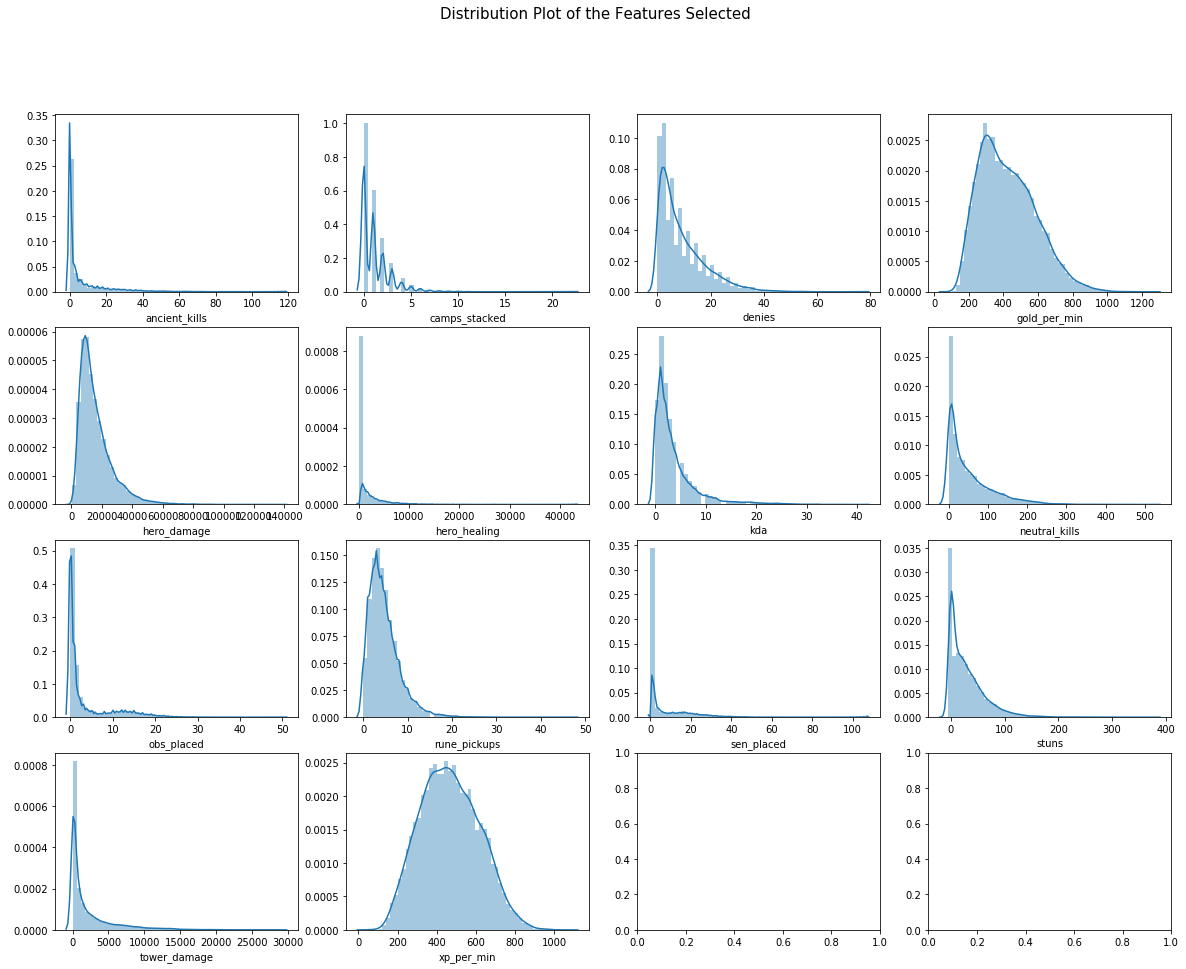

In [12]:
# Plotting distributions of each feature
fig, ax = plt.subplots(4, 4, figsize=(20,15))
col = 0
for i in range(4):
    for k in range(4):
        try:
            sns.distplot(df_dropped.iloc[:, col], ax=ax[i,k])
            col += 1
        except:
            pass
fig.suptitle('Distribution Plot of the Features Selected', fontsize=15)
plt.savefig('distribution.png', transparent=True)

<div align='justify'>For the relationship of each feature with each other, the researchers used a pairplot to see which features go on the same direction (i.e. correlated with each other positively), opposite direction (correlated with each other negatively) or no relationship at all. Correlated features can be dropped depending on the researchers' decision.</div>

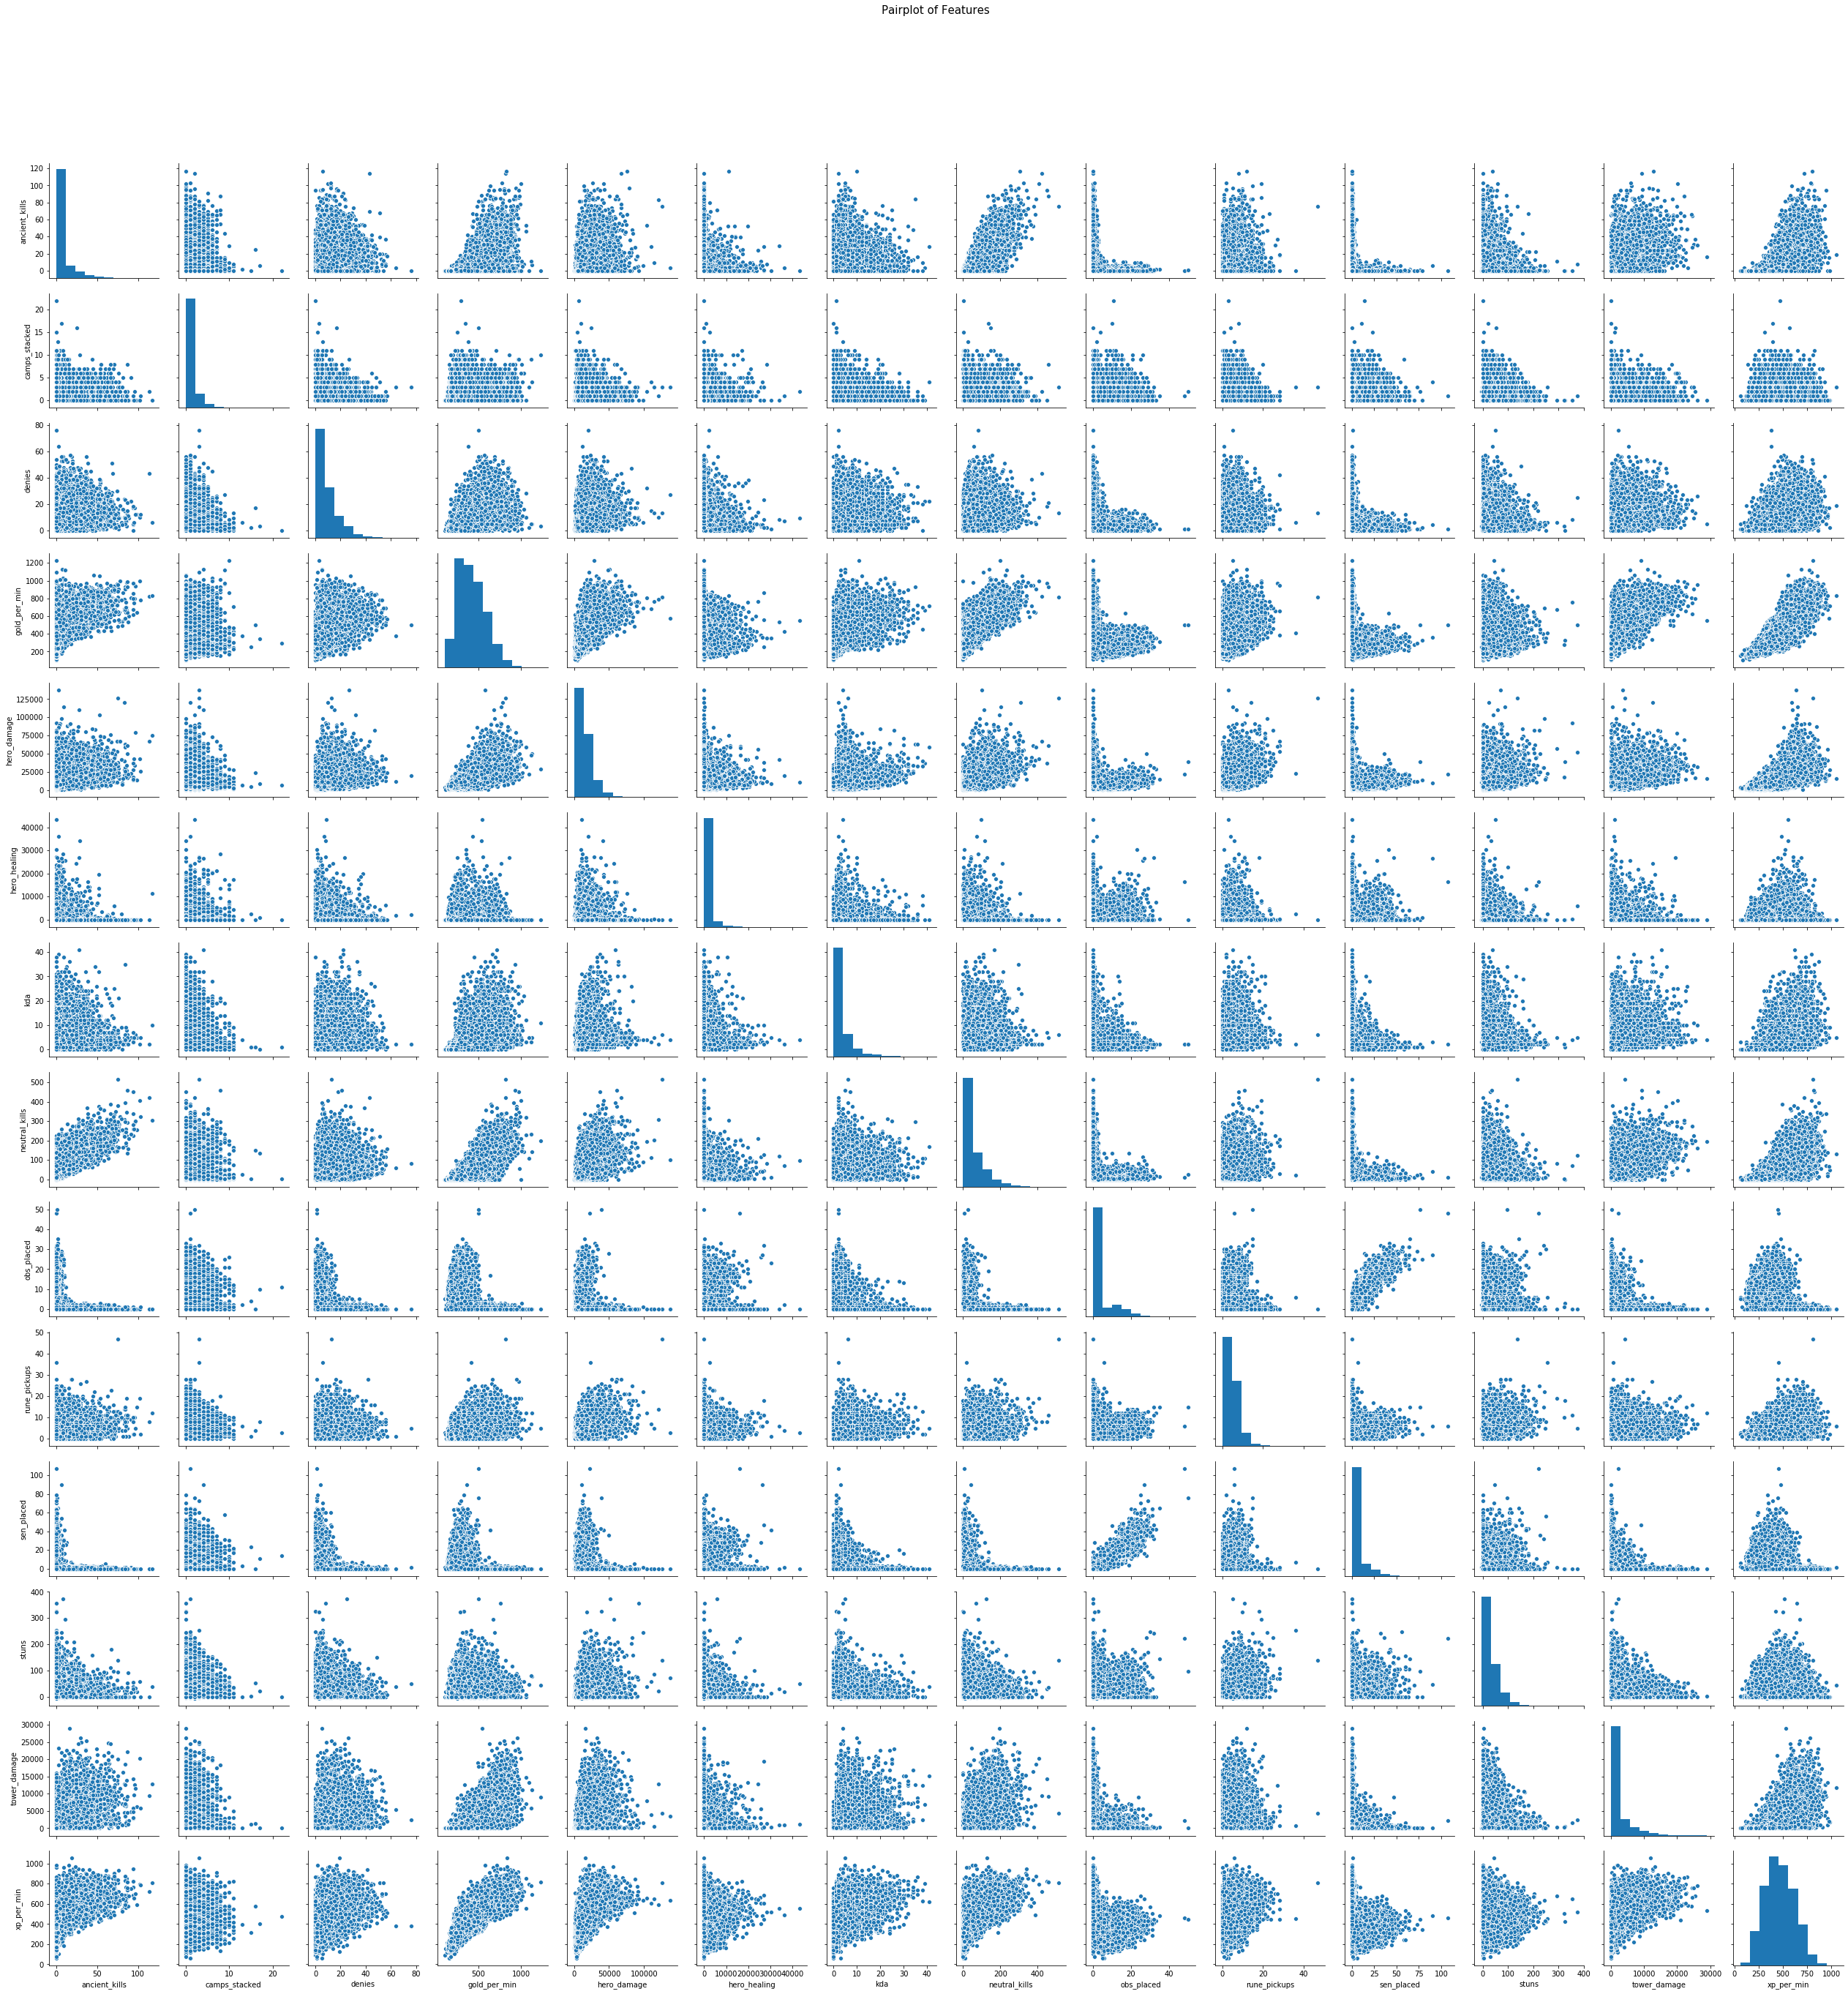

In [13]:
# Pairplot of each feature
g = sns.pairplot(df_dropped)
g.fig.suptitle("Pairplot of Features", fontsize=15, y=1.08);

<div align='justify'>From the figure above, it can be seen that obs_placed and sen_placed are positively correlated. However, the researchers' made the final call not to drop one of these features as these features are entirely different items in-game.</div>

[Back to Table of Contents](#table_of_contents)

<a id='methodology'></a>
<div>
<font color='red'><h2>6. Methodology</h2> </font>
</div>

<div align='justify'>The initial part of the analysis starts with clustering which groups together datapoints or in this case, heroes with similar game impact based on the features the researchers identified.</div>
<br>
<div align='justify'>It is important to cluster the heroes prior to recommending alternative heroes to the banned hero to minimize the deviation from the original game strategy. To elaborate, this means that if a team wants a hero to be played for a specific role (which delivers a certain game impact) and it gets banned, the team will first look into the group of heroes with that role and try to find alternative heroes which are most similar to the banned hero in terms of game impact.</div>
<br>
<div align='justify'>Failing to do this would just result to identifying alternatives, regardless of the game impact that the team would like that hero to provide. (e.g. Playing a core windranger delivers a different game impact than a support windranger. If the team queries without the clusters, it would be impossible for them to identify alternatives for a core or support windranger).</div>
<br>
<div align='justify'>Below is the step-by-step procedure on how to arrive at the clusters and how alternative heroes will be identified:</div>
6.1 Normalizing the Data<br>
6.2 Clustering using KMeans<br>
- 6.2.1 Determining the Optimal Number of Clusters<br>
- 6.2.2 Clustering Heroes and Naming the Clusters Formed<br>
6.3 Determining the Most Similar Heroes for a Banned Hero

<a id='normalize_data'></a>
<div style="padding:15px">
<font color='red'><h3>6.1 Normalizing the data</h3> </font>
</div>

<div align='justify'>As what was stated in Sections 4.4 and 5, the scales of values of each feature are highly different from each other. This could have a great impact on the result of the clustering. That is why the researchers opted to normalize the data for all features using the StandardScaler method of normalization.</div>
<br>
<div align='justify'>Normalization changes only the values of the dataset by forcing the mean to be equal to zero (0) and standard deviation to be equal to one (1), however, it does not change the distribution of the original dataset. To validate this claim, shown below are the plots of the data before and after normalization.</div>

In [14]:
# Normalizing df_dropped
standard_scaler = StandardScaler()
df_dropped_normed = standard_scaler.fit_transform(df_dropped.iloc[:,:-1])

In [15]:
# Creating a mapping of feature names per column since normalizing removes the
# column names
feat_map = {}
for k, v in enumerate(df_dropped.iloc[:,:-1].columns.to_list()):
    feat_map[k] = v

# Reassigning column names to df_dropped_normed
df_dropped_normed = pd.DataFrame(df_dropped_normed).rename(columns=feat_map)
df_dropped_normed.head()

,ancient_kills,camps_stacked,denies,gold_per_min,hero_damage,hero_healing,kda,neutral_kills,obs_placed,rune_pickups,sen_placed,stuns,tower_damage,xp_per_min
0,-0.512411,-0.751119,0.224396,-0.068725,-0.362602,-0.410818,-0.598684,-0.424655,-0.579679,-0.473285,-0.492859,0.363522,-0.472994,0.285802
1,-0.512411,-0.751119,-0.940484,-1.015061,-0.942693,1.534335,-0.598684,-0.806833,-0.579679,-0.184934,-0.382340,0.913910,-0.574101,-1.119243
2,-0.512411,-0.751119,0.224396,-0.037390,-0.370278,0.282749,-0.821909,-0.459398,-0.405544,-0.473285,-0.492859,-0.479999,-0.287875,-0.617441
3,-0.512411,-0.751119,-1.056972,-0.877184,-0.395386,-0.349943,-0.598684,-0.806833,1.858216,-0.473285,0.059735,-0.459176,0.120388,-0.998811
4,-0.512411,-0.751119,0.107908,-0.250472,-0.250160,-0.410818,-0.598684,0.027010,-0.579679,-0.761636,-0.492859,-0.584360,-0.368938,-0.650895


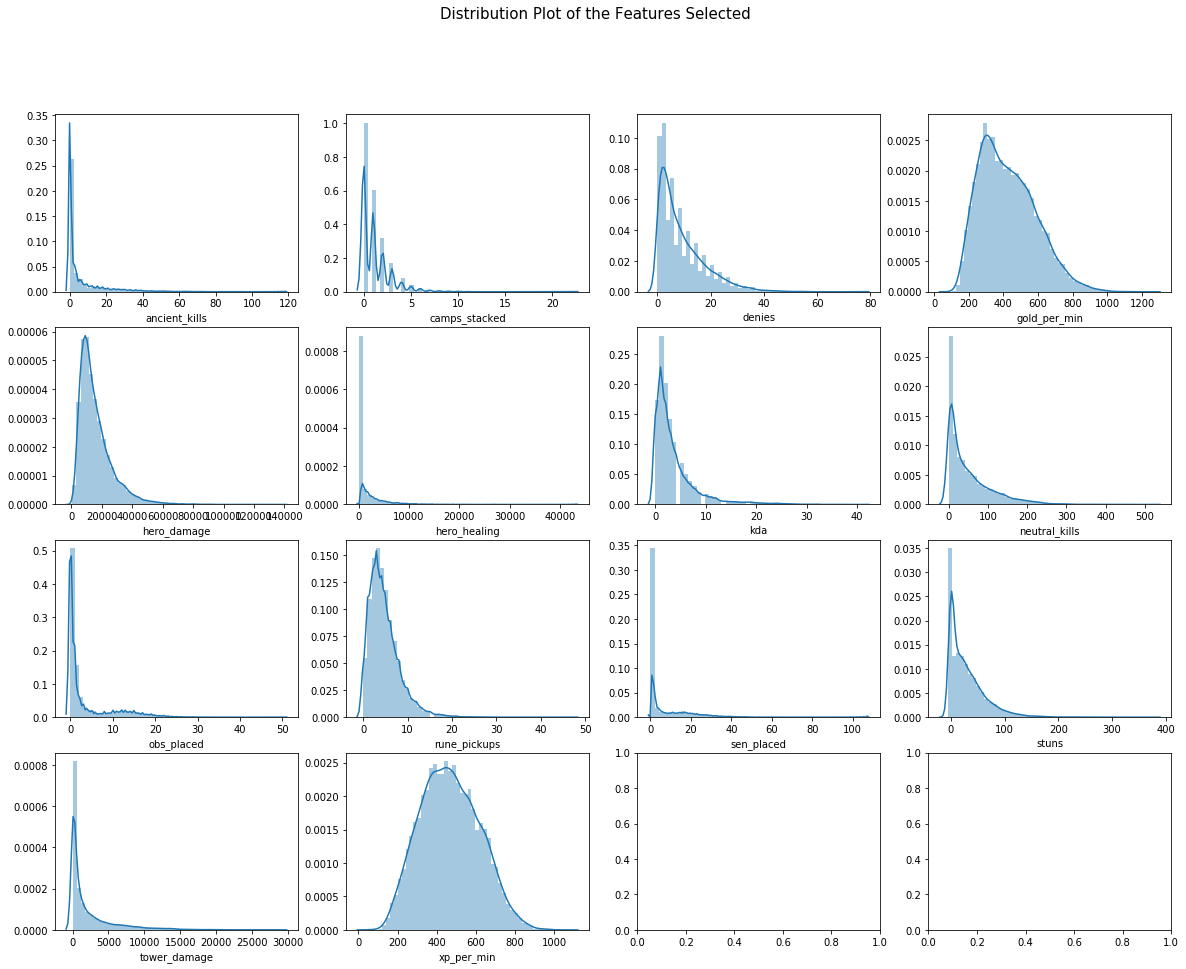

In [16]:
# Plotting distributions of each feature
fig, ax = plt.subplots(4, 4, figsize=(20,15))
col = 0
for i in range(4):
    for k in range(4):
        try:
            sns.distplot(df_dropped.iloc[:, col], ax=ax[i,k])
            col += 1
        except:
            pass
fig.suptitle('Distribution Plot of the Features Selected', fontsize=15)
plt.savefig('distribution.png', transparent=True)

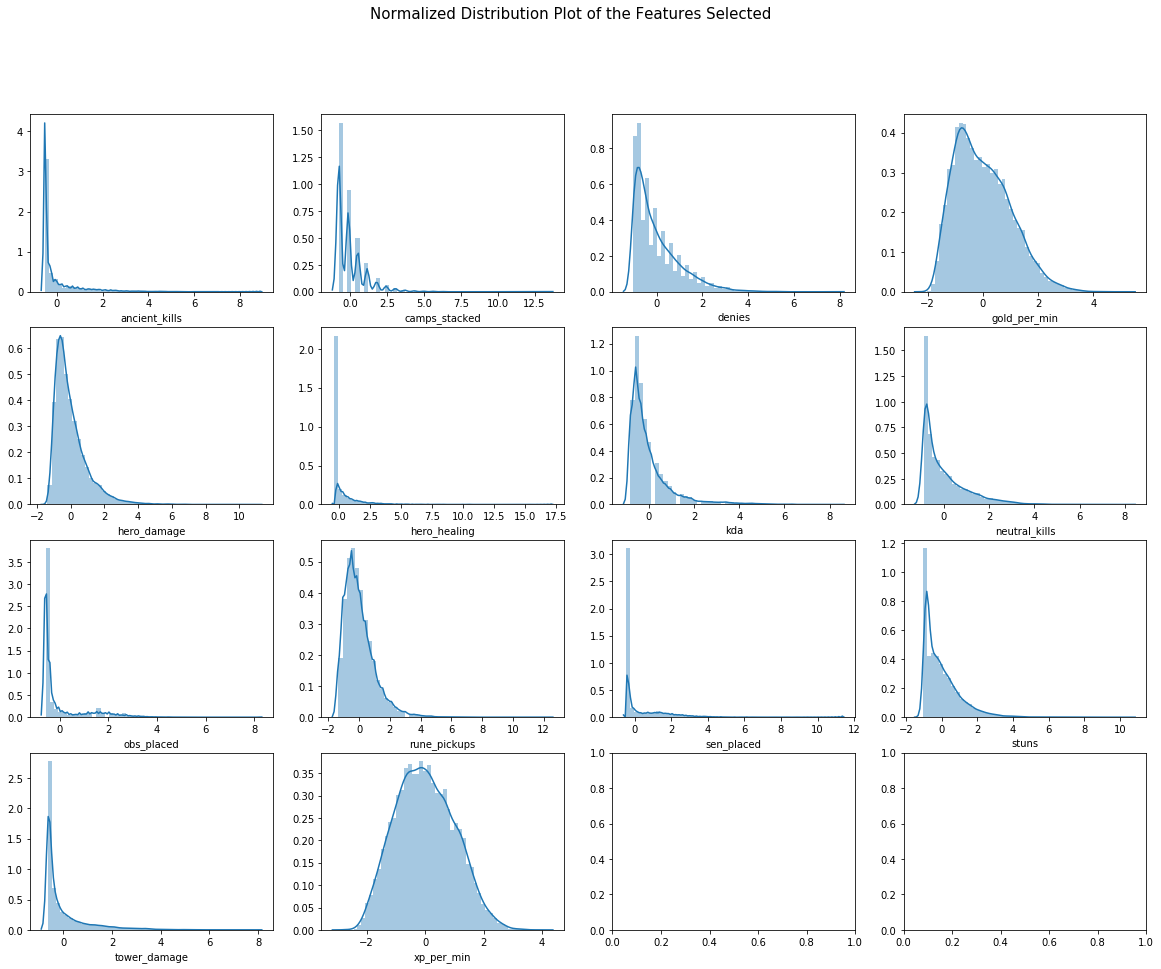

In [17]:
# Plotting normalized distributions of each feature
fig, ax = plt.subplots(4, 4, figsize=(20,15))
col = 0
for i in range(4):
    for k in range(4):
        try:
            sns.distplot(df_dropped_normed.iloc[:, col], ax=ax[i,k])
            col += 1
        except:
            pass
        
fig.suptitle('Normalized Distribution Plot of the Features Selected', fontsize=15);

As seen from the two distribution plots above, the distribution (shape) remained but the mean and standard deviations were set to zero (0) and one (1) respectively.

In [18]:
# Creating a new copy of df_dropped with no normalization to append cluster
# labels later
df_dropped_clustered = df_dropped.copy()

<a id='clustering_kmeans'></a>
<div style="padding:15px">
<font color='red'><h3>6.2 Clustering using K-Means</h3> </font>
</div>



<div align='justify'>To cluster the heroes based on their game impact, K-Means clustering algorithm, known as the simplest and most popular representative-based clustering method was used. This method is useful in clustering data with few features; with mostly continuous variables, and when an available ground truth can be used as the initial number of clusters based on the researchers' domain knowledge. The mean of the points in the cluster is chosen to be the representative for that cluster. In order to determine the optimal number of clusters to use, internal validation criteria were used and the themes extracted from the optimal number of clusters formed were analyzed as a form of sanity check.</div>

<a id='internal_validation'></a>
<div style="padding:30px">
<font color='red'><h3>6.2.1 Determining the Optimal Number of Clusters (choose best k)</h3> </font>
</div>

To determine the optimal number of clusters that best fits the data, internal validation criteria were used. Below are the internal validations used to evaluate the clusters formed using K-Means.

* **Sum of Squares Distance to Centroids (SSE)** - corresponds to the sum of squares distances to the representative points. The smaller the values, the better is the clustering.
* **Calinski-Harabasz index (CH)** - ratio of the average between-clusters dispersion and within-cluster dispersion. Higher values of this metric means better clustering.
* **Silhouette coefficient (SC)** - its value ranges from -1 to 1 which means that if the value is largely positive, the clusters are highly separated while if negative, there are some mixing of data points among clusters.

Below are the functions that we used in performing the internal validation criteria.

* **cluster_range** - computes the cluster range from the given design matrix. It outputs a dictionary of cluster labels and internal validation values
* **plot_internal** - plot of the results of the internal validation criteria

In [19]:
# Defining Intra to Inter cluster ratio function
def intra_to_inter(X, y, dist, r):
    """Compute intracluster to intercluster distance ratio
    
    Parameters
    ----------
    X : array
        Design matrix with each row corresponding to a point
    y : array
        Class label of each point
    dist : callable
        Distance between two points. It should accept two arrays, each 
        corresponding to the coordinates of each point
    r : integer
        Number of pairs to sample
        
    Returns
    -------
    ratio : float
        Intracluster to intercluster distance ratio
    """    
    P = []
    Q = []

    for i in range(r):
        z = np.random.randint(0, len(X), 2)
        
        if z[0] == z[1]:
            continue
        
        elif y[z[0]] == y[z[1]]:
            P.append(dist(X[z[0]], X[z[1]]))

        else:
            Q.append(dist(X[z[0]], X[z[1]]))
            
    return (np.average(P) / np.average(Q))

In [20]:
# Defining a function to plot each internal validation criteria
def plot_internal(inertias, chs, scs):
    """Plot internal validation values"""
    fig, ax = plt.subplots(2,2, figsize=(15,10))
    ks = np.arange(2, len(inertias)+2)
    
    fig.suptitle('Internal Validation Criteria Values', fontsize=15)
    
    ax[0,0].plot(ks, inertias, '-o', label='SSE (Lower is better)')
    ax[0,0].axvline(3, ls='--', c='k')
    ax[0,1].plot(ks, chs, '-ro', label='CH (Higher is better)')
#     ax[0,1].axvline(3, ls='--', c='k')
    ax[0,0].set_xlabel('$k$')
    ax[0,0].set_title('SSE (Lower is better)')
    ax[0,1].set_xlabel('$k$')
    ax[0,1].set_title('CH (Higher is better)')

#     ax[1,0].plot(ks, iidrs, '-go', label='Inter-intra (Lower is better)')
#     ax[1,0].axvline(5, ls='--', c='k')

    ax[1,1].plot(ks, scs, '-ko', label='Silhouette coefficient (Higher is better)')
#     ax[1,0].set_title('Inter-Intra (Lower is better)')
#     ax[1,0].set_xlabel('$k$')
    ax[1,1].set_title('Silhouette (Higher is better)')
    ax[1,1].set_xlabel('$k$')

    return fig

In [21]:
def cluster_range(X, clusterer, k_start, k_stop):
    """Compute cluster range from the given design matrix

    Parameters
    ----------
    X : array
        Design matrix with each row corresponding to a point
    clusterer : 
        the clustering object
    k_start :integer
        starting number of clusters
    k_stop : integer
        ending number of clusters

    Returns
    -------
    validation : dictionary
        Dictionary of cluster labels, internal validation values and 
        actual labels
    """
    validation = {'ys': [],
                  'inertias': [],
                  'chs': [],
                  'iidrs': [],
                  'scs': []}

    for k in list(range(k_start, k_stop+1)):
        np.random.seed(11)
        kmeans_X = KMeans(
            n_clusters=k, random_state=clusterer.random_state)
        y_predict_X = kmeans_X.fit_predict(X)

        validation['ys'] += [y_predict_X]
        validation['inertias'] += [kmeans_X.inertia_]
        validation['chs'] += [calinski_harabaz_score(X, y_predict_X)]
        validation['iidrs'] += [intra_to_inter(X, y_predict_X,
                                               euclidean, 50)]
        validation['scs'] += [silhouette_score(X,  y_predict_X)]

    return validation# Creating a cluster range for various k

def cluster_range(X, clusterer, k_start, k_stop):
    """
    Returns a dictionary of the cluster labels and internal validation values
    
    Parameters
    ----------
    X : design matrix
    
    clusterer : clustering object
    
    k_start : int
        Initial k
    k_stop : int
        Final k
        
    Returns
    -------
    validation : dict
        Contains the cluster labels and internal validation values
    """
    validation = {'ys': [],
                  'inertias': [],
                  'chs': [],
                  'iidrs': [],
                  'scs': []}

    for k in range(k_start, k_stop+1):
        np.random.seed(11)
        kmeans_X = KMeans(
            n_clusters=k, random_state=clusterer.random_state)
        y_predict_X = kmeans_X.fit_predict(X)

        validation['ys'] += [y_predict_X]
        validation['inertias'] += [kmeans_X.inertia_]
        validation['chs'] += [calinski_harabaz_score(X, y_predict_X)]
#         validation['iidrs'] += [intra_to_inter(X, y_predict_X,
#                                                euclidean, 50)]
        validation['scs'] += [silhouette_score(X,  y_predict_X)]

    return validation

In [22]:
# Calculating internal validation criteria for various k
res_X_normed = cluster_range(df_dropped_normed, KMeans(random_state=1337), 2, 11)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.p

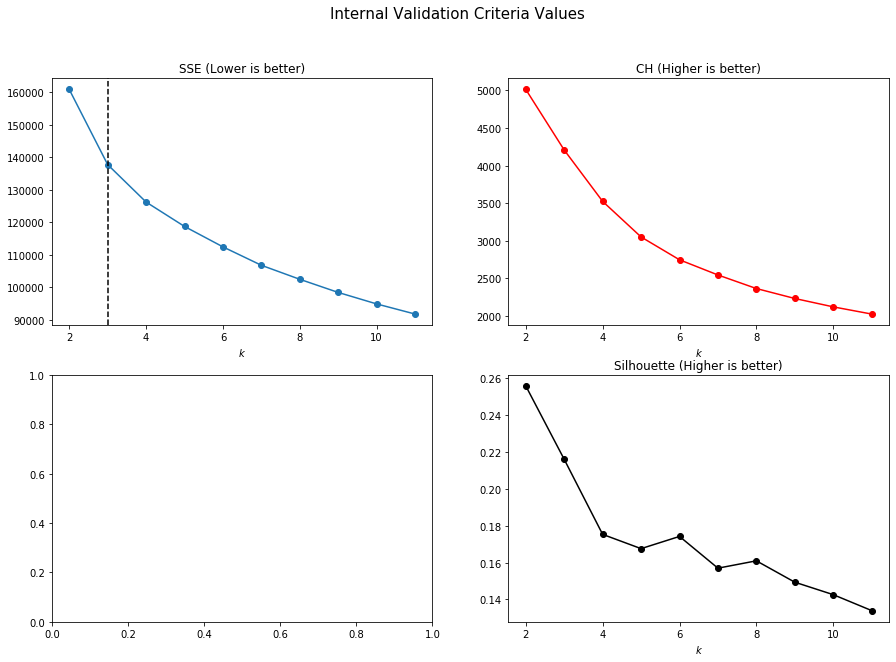

In [23]:
# Plotting internal validation criteria for various k
plot_internal(res_X_normed['inertias'], res_X_normed['chs'], 
              res_X_normed['scs']);

<div align='justify'>Based on the plots above, it can be seen that for SSE, the elbow occured when k = 3. The "elbow" is defined as when the sum of squares error is minimized. For the CH, it can be seen that the trend is decreasing so there would be no conclusive value. For the Silhouette, it is ideal to have a high value. However, it is also decreasing similar to the CH. Thus, no conclusive value can be derived. With this, the researchers identified the number of optimal clusters only by the plot of SSE which is equivalent to three (3). 
<br><br>    
For the clustering proper, k = 3 will be the basis since K-Means requires a parameter for the number of clusters before performing the clustering.</div>

[Back to Table of Contents](#table_of_contents)

<a id='clustering'></a>
<div>
<font color='red'><h2>7. Clustering Proper</h2> </font>
</div>

<div align='justify'>The section below discusses the clustering of heroes when k = 3. To determine the cluster of the actual heroes data, the researchers appended the cluster number that was produced in the dataframe to help in separating the groups that was formed. With each hero observation properly clustered, the researchers can then obtain some statistics needed to describe the clusters formed. After that, the most important features per cluster can be identified which will serve as the basis for extracting the theme observed in that cluster.</div>

In [24]:
# Running k-means
k = 3

k_means = KMeans(n_clusters=k, random_state = 1337)\
                        .fit(df_dropped_normed)
df_dropped_clustered['Cluster'] = k_means.labels_

cluster_list = {}
for i in range(k):
    cluster_list[i] = df_dropped_clustered[df_dropped_clustered['Cluster']==i]

In [25]:
# Assign each cluster to a dataframe variable
cluster_0 = cluster_list[0]
cluster_1 = cluster_list[1]
cluster_2 = cluster_list[2]

In [27]:
# Creating most important features mapper per cluster
terms = df_dropped_clustered.columns

feat_list = []
for i in range(k):
    feat_list_per_cluster = []
    for ind in k_means.cluster_centers_.argsort()[:, ::-1][i, :]:
        feat_list_per_cluster.append(terms[ind])
        
    feat_list.append(feat_list_per_cluster)
    
weight_list = np.sort(k_means.cluster_centers_)[:,::-1].tolist()

fw_fin = []
for i in range(len(feat_list)):
    fw = []
    for feat, weight in zip(feat_list[i], weight_list[i]):
        fw.append((feat, weight))
    fw_fin.append(fw)

After clustering each hero observation based on its game impact, the researchers aggregated each hero observation per cluster by calculating the mean values of the features for each unique hero. Additionally, the most important features for each cluster were identified using the `k_means.cluster_centers_` function.

In [28]:
# Aggregating each cluster per hero
cluster0_agg = cluster_0.groupby('hero_id').mean() # Offlane - Disabler / Healer - Position 3/4 - Utility
cluster1_agg = cluster_1.groupby('hero_id').mean() # Support - Position 5
cluster2_agg = cluster_2.groupby('hero_id').mean() # Carry/Mid - Position 1/2


In [29]:
# Reindexed columns according to feature importance
cluster0_agg_re = cluster0_agg.reindex(columns=feat_list[0])
cluster1_agg_re = cluster1_agg.reindex(columns=feat_list[1])
cluster2_agg_re = cluster2_agg.reindex(columns=feat_list[2])

The most important features for each cluster are the following. For Cluster 0 -- stuns, hero_healing, camps_stacked; For Cluster 1 -- obs_placed, sen_placed, hero_healing; For Cluster 2 -- gold_per_min, neutral_kills, xp_per_min.
<br><br>
Below is the complete list of features per cluster ordered by decreasing importance.

In [33]:
print('Cluster 0 most important features: \n', cluster0_agg_re.columns.tolist())
print('\nCluster 1 most important features: \n', cluster1_agg_re.columns.tolist())
print('\nCluster 2 most important features: \n', cluster2_agg_re.columns.tolist())

Cluster 0 most important features: 
 ['stuns', 'hero_healing', 'camps_stacked', 'rune_pickups', 'denies', 'kda', 'xp_per_min', 'hero_damage', 'gold_per_min', 'neutral_kills', 'ancient_kills', 'tower_damage', 'sen_placed', 'obs_placed']

Cluster 1 most important features: 
 ['obs_placed', 'sen_placed', 'hero_healing', 'camps_stacked', 'stuns', 'rune_pickups', 'kda', 'ancient_kills', 'tower_damage', 'hero_damage', 'denies', 'neutral_kills', 'xp_per_min', 'gold_per_min']

Cluster 2 most important features: 
 ['gold_per_min', 'neutral_kills', 'xp_per_min', 'tower_damage', 'ancient_kills', 'hero_damage', 'denies', 'kda', 'rune_pickups', 'camps_stacked', 'hero_healing', 'stuns', 'sen_placed', 'obs_placed']


Looking at the list of features above and the distributions of each cluster plotted per feature below, the researchers can then define the themes of each cluster formed. The three (3) clusters were named as Utility (Cluster 0), Support (Cluster 1) and Core (Cluster 2).


Based on the plots below, majority of the distribution plots are very telling of each cluster's characteristics:
- Utility heroes are almost always in between cores and supports (see gold_per_min, xp_per_min, hero_damage)
- Supports are opposite of cores, and have high values in obs_placed and sen_placed
- Cores tend to have higher denies, kda, xp_per_min, hero_damage, gold_per_min, neutral_kills and tower_damage values

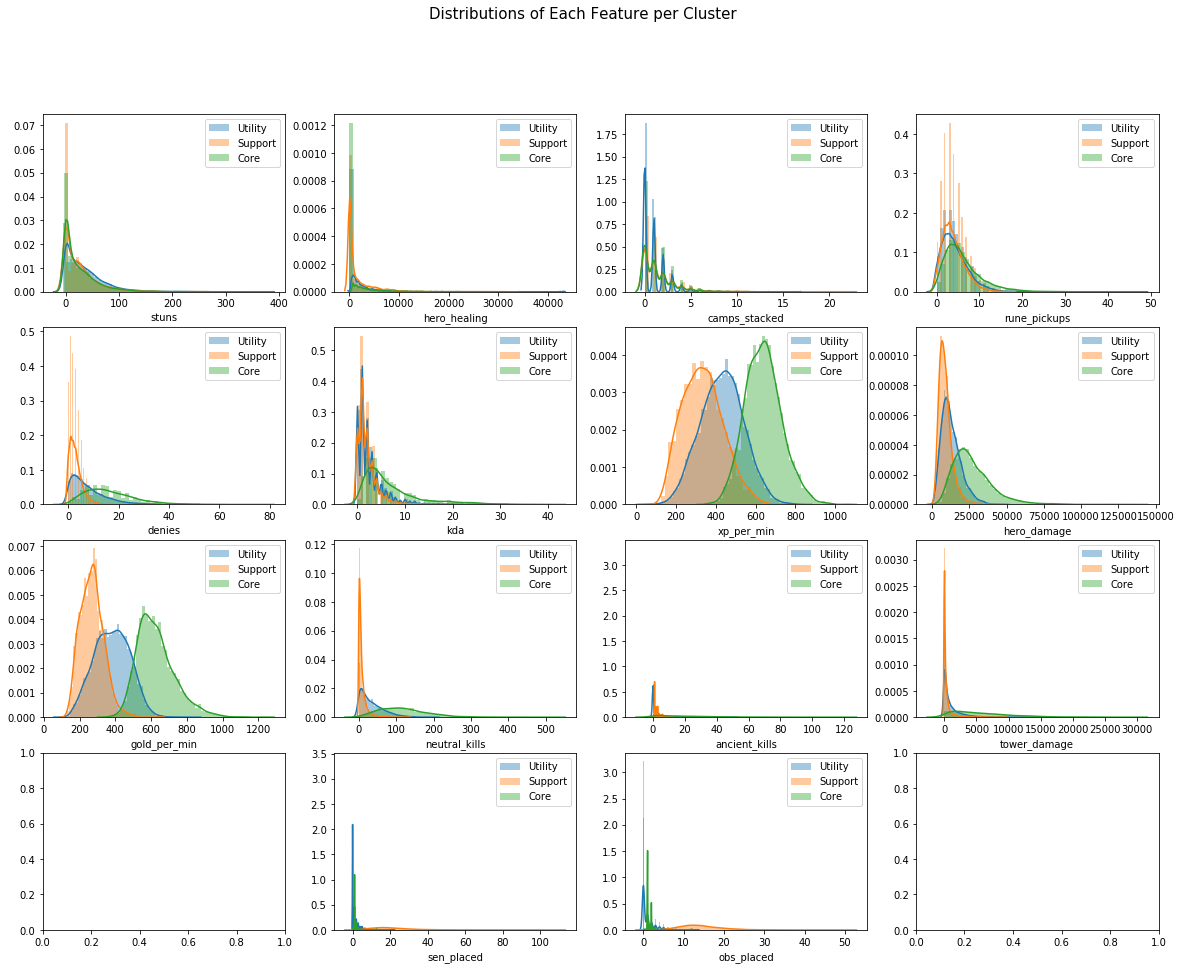

In [34]:
# Plotting distributions of features for each cluster
fig, ax = plt.subplots(4, 4, figsize=(20,15))

#Row 1
sns.distplot(cluster_0.loc[:, 'stuns'], ax = ax[0,0], label='Utility')
sns.distplot(cluster_1.loc[:, 'stuns'], ax = ax[0,0], label='Support')
sns.distplot(cluster_2.loc[:, 'stuns'], ax = ax[0,0], label='Core')
ax[0,0].legend()

sns.distplot(cluster_0.loc[:, 'hero_healing'], ax = ax[0,1], label='Utility')
sns.distplot(cluster_1.loc[:, 'hero_healing'], ax = ax[0,1], label='Support')
sns.distplot(cluster_2.loc[:, 'hero_healing'], ax = ax[0,1], label='Core')
ax[0,1].legend()

sns.distplot(cluster_0.loc[:, 'camps_stacked'], ax = ax[0,2], label='Utility')
sns.distplot(cluster_1.loc[:, 'camps_stacked'], ax = ax[0,2], label='Support')
sns.distplot(cluster_2.loc[:, 'camps_stacked'], ax = ax[0,2], label='Core')
ax[0,2].legend()

sns.distplot(cluster_0.loc[:, 'rune_pickups'], ax = ax[0,3], label='Utility')
sns.distplot(cluster_1.loc[:, 'rune_pickups'], ax = ax[0,3], label='Support')
sns.distplot(cluster_2.loc[:, 'rune_pickups'], ax = ax[0,3], label='Core')
ax[0,3].legend()

#Row 2
sns.distplot(cluster_0.loc[:, 'denies'], ax = ax[1,0], label='Utility')
sns.distplot(cluster_1.loc[:, 'denies'], ax = ax[1,0], label='Support')
sns.distplot(cluster_2.loc[:, 'denies'], ax = ax[1,0], label='Core')
ax[1,0].legend()

sns.distplot(cluster_0.loc[:, 'kda'], ax = ax[1,1], label='Utility')
sns.distplot(cluster_1.loc[:, 'kda'], ax = ax[1,1], label='Support')
sns.distplot(cluster_2.loc[:, 'kda'], ax = ax[1,1], label='Core')
ax[1,1].legend()

sns.distplot(cluster_0.loc[:, 'xp_per_min'], ax = ax[1,2], label='Utility')
sns.distplot(cluster_1.loc[:, 'xp_per_min'], ax = ax[1,2], label='Support')
sns.distplot(cluster_2.loc[:, 'xp_per_min'], ax = ax[1,2], label='Core')
ax[1,2].legend()

sns.distplot(cluster_0.loc[:, 'hero_damage'], ax = ax[1,3], label='Utility')
sns.distplot(cluster_1.loc[:, 'hero_damage'], ax = ax[1,3], label='Support')
sns.distplot(cluster_2.loc[:, 'hero_damage'], ax = ax[1,3], label='Core')
ax[1,3].legend()

#Row 3
sns.distplot(cluster_0.loc[:, 'gold_per_min'], ax = ax[2,0], label='Utility')
sns.distplot(cluster_1.loc[:, 'gold_per_min'], ax = ax[2,0], label='Support')
sns.distplot(cluster_2.loc[:, 'gold_per_min'], ax = ax[2,0], label='Core')
ax[2,0].legend()

sns.distplot(cluster_0.loc[:, 'neutral_kills'], ax = ax[2,1], label='Utility')
sns.distplot(cluster_1.loc[:, 'neutral_kills'], ax = ax[2,1], label='Support')
sns.distplot(cluster_2.loc[:, 'neutral_kills'], ax = ax[2,1], label='Core')
ax[2,1].legend()

sns.distplot(cluster_0.loc[:, 'ancient_kills'], ax = ax[2,2], label='Utility')
sns.distplot(cluster_1.loc[:, 'ancient_kills'], ax = ax[2,2], label='Support')
sns.distplot(cluster_2.loc[:, 'ancient_kills'], ax = ax[2,2], label='Core')
ax[2,2].legend()

sns.distplot(cluster_0.loc[:, 'tower_damage'], ax = ax[2,3], label='Utility')
sns.distplot(cluster_1.loc[:, 'tower_damage'], ax = ax[2,3], label='Support')
sns.distplot(cluster_2.loc[:, 'tower_damage'], ax = ax[2,3], label='Core')
ax[2,3].legend()

#Row 4
sns.distplot(cluster_0.loc[:, 'sen_placed'], ax = ax[3,1], label='Utility')
sns.distplot(cluster_1.loc[:, 'sen_placed'], ax = ax[3,1], label='Support')
sns.distplot(cluster_2.loc[:, 'sen_placed'], ax = ax[3,1], label='Core')
ax[3,1].legend()

sns.distplot(cluster_0.loc[:, 'obs_placed'], ax = ax[3,2], label='Utility')
sns.distplot(cluster_1.loc[:, 'obs_placed'], ax = ax[3,2], label='Support')
sns.distplot(cluster_2.loc[:, 'obs_placed'], ax = ax[3,2], label='Core')
ax[3,2].legend()

fig.suptitle('Distributions of Each Feature per Cluster', fontsize=15);

To further visualize the most important features of each cluster, the researchers plotted a radar plot with feature weights as values seen below. The radar plot is consistent with the list of features and distribution plots discussed above.

In [35]:
# Creating a radar dataframe
radar = {'cluster' : ['0 (Utility)', '1 (Support)', '2 (Core)']}
for i in range(len(fw_fin)):
    for x in range(len(fw_fin[i])):
        if fw_fin[i][x][0] not in radar.keys():
            radar[fw_fin[i][x][0]] = [fw_fin[i][x][1]]
        else:
            radar[fw_fin[i][x][0]].append(fw_fin[i][x][1])
            
df_radar = pd.DataFrame(radar)

In [36]:
def make_spider( row, title, color):
 
    # number of variable
    categories=list(df_radar)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(1,3,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([-2, -1, 0, 1], ["-2", "-1", "0","1","2"], color="grey", size=7)
    plt.ylim(-2,2)

    # Ind1
    values=df_radar.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

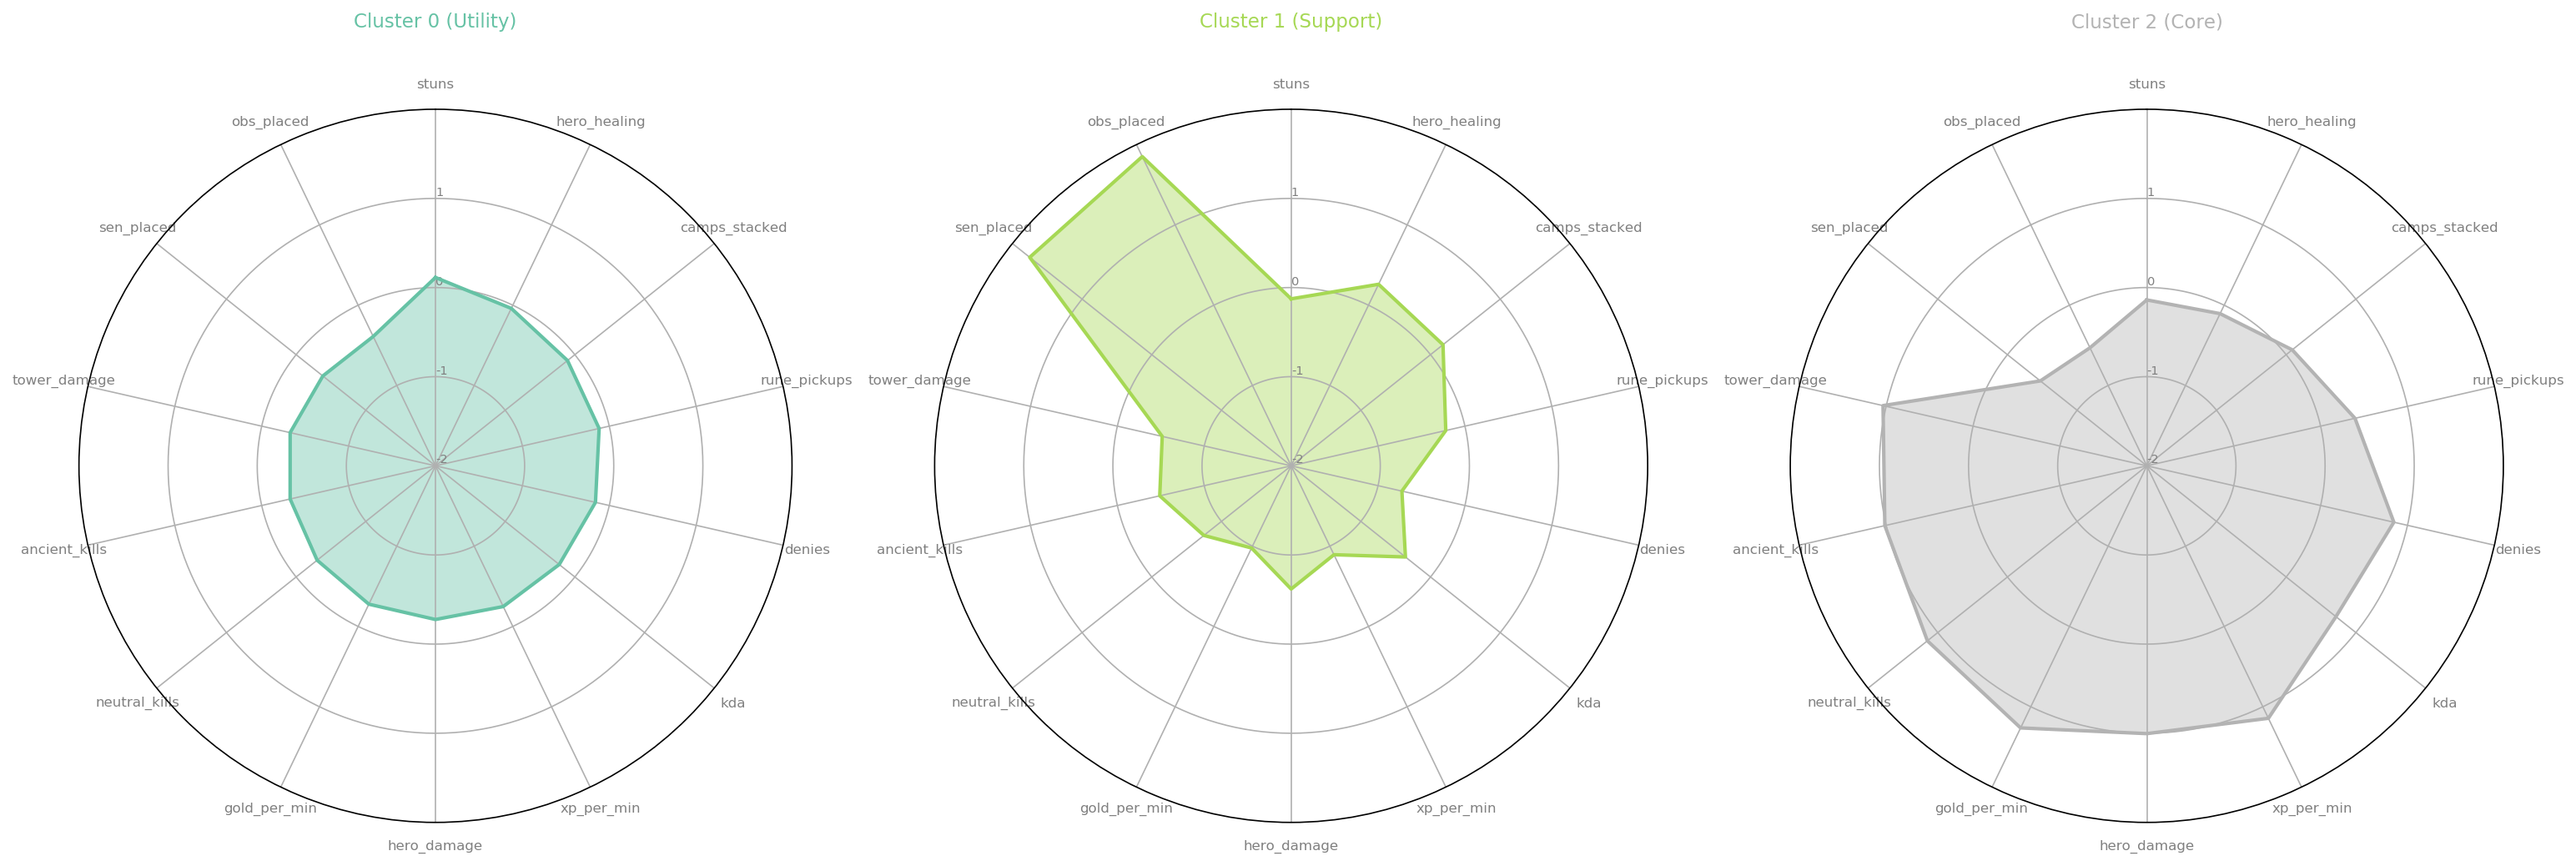

In [37]:
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=150
plt.figure(figsize=(25,15), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df_radar.index))
 
# Loop to plot
for row in range(0, len(df_radar.index)):
    make_spider( row=row, title='Cluster '+df_radar['cluster'][row], color=my_palette(row))


The Utility cluster contains a total of 117 heroes. The Support cluster contains a total of 60 heroes. While the Core cluster contains a total of 91 heroes.

A sample of the actual heroes included in each cluster is given below (limited to five (5) heroes only).

In [141]:
print('Utility:')
print(np.random.choice(list(set(cluster_0['hero_id'])), 5))

Utility:
['night_stalker' 'magnataur' 'dazzle' 'slardar' 'dark_willow']


In [65]:
print('Support:')
print(np.random.choice(list(set(cluster_1['hero_id'])), 5))

Support:
['grimstroke' 'tusk' 'skywrath_mage' 'enigma' 'oracle']


In [72]:
print('Core:')
print(np.random.choice(list(set(cluster_2['hero_id'])), 5))

Core:
['slark' 'troll_warlord' 'venomancer' 'viper' 'dragon_knight']


<a id='information_retrieval'></a>
<div>
<font color='red'><h3>7.1 Determining the Most Similar Heroes for a Sampled Hero</h3> </font>
</div>

Now that we have clustered our heroes, we can do the second part of the analysis which is to recommend alternative picks for the said hero. By calculating the Euclidean distance between heroes on the same cluster/feature space, we can select the k most similar heroes to the banned hero.

In [39]:
# Object retrieval function
def nearest_k(df, query, objects, k, dist):
    """Return the indices to objects most similar to query
    
    Parameters
    ----------
    df : dataframe
        Dataframe to retrieve target names from
    query : ndarray
        query object represented in the same form vector representation as the
        objects
    objects : ndarray
        vector-represented objects in the database; rows correspond to 
        objects, columns correspond to features
    k : int
        number of most similar objects to return
    dist : function
        accepts two ndarrays as parameters then returns their distance
    
    Returns
    -------
    most_similar : ndarray
        Indices to the most similar objects in the database
    """
    indices = np.argsort([dist(i, query) for i in objects])[1:k+1]
    
    return df.iloc[indices, :].index.tolist()

In [40]:
# Creating a query function
def findsimilarhero(query, cluster_number, k=3):
    '''Returns a dataframe of k most similar hero from the query using
    euclidean distance
    
    Parameters
    ----------
    query : str
        hero name to query
    cluster_number : str
        cluster to query in
    k : int
        number of similar heroes to return
        
    Returns
    -------
    df : dataframe
        dataframe of k most similar hero from the query
    '''
    try:
        if cluster_number == 'utility':
            cluster_number = cluster0_agg_re
        elif cluster_number == 'support':
            cluster_number = cluster1_agg_re
        elif cluster_number == 'core':
            cluster_number = cluster2_agg_re
        else:
            return print('No cluster', cluster_number, 'found!')
    
        return nearest_k(cluster_number, cluster_number.loc[query, :].values, cluster_number.values, k, euclidean)
    except:
        return print('This hero is not played for this role!')

For example, a team wanted to pick a support Crystal Maiden. However, the opposing team banned it. We then determine the most similar heroes with a sample query shown below.

In [41]:
# Sample query 
#(Input: 'Banned Hero Name', 'Supposed Role', 'No. of similar heroes')
print('Querying for an alternative to a support Crystal Maiden:')
findsimilarhero('crystal_maiden', 'support', k=4)

Querying for an alternative to a support Crystal Maiden:


['elder_titan', 'ancient_apparition', 'lich', 'rubick']

As another example, suppose a team wanted to play Abaddon as a support --

In [42]:
# Sample query
#(Input: 'Banned Hero Name', 'Supposed Role', 'No. of similar heroes')
print('Querying for an alternative to a support Abaddon:')
findsimilarhero('abaddon', 'support', k=4)

Querying for an alternative to a support Abaddon:


['dazzle', 'oracle', 'treant', 'chen']

To show the purpose of clustering, suppose that the team wanted to play abaddon as a core --

In [43]:
# Sample query
#(Input: 'Banned Hero Name', 'Supposed Role', 'No. of similar heroes')
print('Querying for an alternative to a core Abaddon:')
findsimilarhero('abaddon', 'core', k=4)

Querying for an alternative to a core Abaddon:


['tidehunter', 'viper', 'nevermore', 'dark_seer']

The resulting similar heroes are fair alternatives for the queried heroes during actual DotA 2 games.

[Back to Table of Contents](#table_of_contents)

<a id='conclusions'></a>
<div>
<font color='red'><h2>8. Conclusions</h2> </font>
</div>

The researchers were able to identify three (3) clusters based on a hero's game impact. The formed clusters and its general characteristics are the following:
- Core: Heroes that are designed to be the primary damage dealers throughout the game and are usually allocated the highest amount of resources. Evident in its top defining features of gold_per_min, neutral_kills and xp_per_min
- Utility: Heroes that are versatile and can adapt to the pace of the game. A mixture of core and suppport. Evident in the distribution plot of features showing that utility heroes are between cores and support.
- Support: Heroes that are primarily played to support cores by providing healing and purchasing items that benefit the whole team. Evident in its top defining features of obs_placed, sen_placed and hero_healing.

Additionally, the researchers were also successful in providing a system that can determine an alternative to a banned hero. Based on the researchers' domain knowledge, the resulting similar heroes are fair alternatives to a queried hero during actual DotA 2 games.

For DotA 2 players, the Core cluster can be defined as Position 1 and 2; Utility as Position 3 and 4; and the Supports as Position 5.

For professional teams, apart from using this system to provide quick alternatives to a banned hero, it can also be used for theorycrafting alternative heroes to widen the pocket strategies of the team.


<a id='recommendations'></a>
<div>
<font color='red'><h2>9. Recommendations</h2> </font>
</div>

The researchers recommend the following to further optimize the system:
- Consider won games only by separating win and lose games. The researchers believe that the maximum potential of a certain hero played at a certain role can only be captured in games that are won.
- Include game duration in normalizing/aggregating hero observation. The duration of the game can skew the stats of a hero.
- Limit the dataset to a per patch basis to eliminate the changes in a certain hero's skillset and offerings.
- Constantly update the database every patch to maintain relevance to the current metagame.

<a id='references'></a>
<div>
<font color='red'><h2>10. References / Acknowledgements</h2> </font>
</div>

To complete the study, the researchers used the following resources as reference: <br><br><sup>[1]</sup> Modes, G. (2019). Game modes. Retrieved 3 June 2019, from https://dota2.gamepedia.com/Game_modes#Captains_Mode <br><sup>[2]</sup> Dota 2 Statistics. (n.d.). Retrieved 3 June 2019, from https://www.opendota.com/explorer <br><sup>[3]</sup> DotA 2 Guide (n.d.). Retrieved 3 June 2019, from https://purgegamers.true.io/g/dota-2-guide/ <br><sup>[4]</sup> Use Faceting for Radar Chart (n.d.). Retrieved 23 July 2019, from https://python-graph-gallery.com/392-use-faceting-for-radar-chart/

In addition to the references used in the study, the researchers would like to acknowledge Prof. Christian Alis, PhD, Prof. Erika Legara, PhD and Prof. Eduardo David, Jr. for mentoring us throughout the course and imparting their knowledge in our journey to become a Data Scientist.

<a id='contact'></a>
<div>
<font color='red'><h2>11. Contact Us</h2> </font>
</div><br>
Justine Buno: jbuno@aim.edu<br/>
Aries de Guzman: adeguzman@aim.edu<br/>
Ray Franco Rivera: rrivera@aim.edu<br/>
Paul Michael Uy: puy@aim.edu<br/>

[Back to Table of Contents](#table_of_contents)